
# Phase Transitions


The importance of looking at phase transitions resides in the multicomponent nature of soft matter and its interaction energy scales.




In [61]:
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Liquid-Liquid Unmixing

Consider two liquids consisting of molecules A and B, which we will bring together and mix. The mixing should happen at constant volume and temperature. We can therefore use the Helmholtz free energy as the quantity that is minimized.

Initially, the separated components have the free energies $F_{\rm A}$ and $F_{\rm B}.$ After the mixing, the free energy that derives from the mixing is $F_{\rm A+B}-(F_{\rm A}+F_{\rm B}).$ If the volume fraction of component A is $\phi_{\rm A}$and the one of component B is $\phi_{\rm B}$ such that **???** , then we can calculate the mixing free energy .

First we calculate the mixing entropy $S_{\rm mix}$ from

\begin{equation}
S=-k_{\rm B}\sum_{i}p_{i}\ln(p_{i})
\end{equation}

which results in

\begin{equation}
S_{\rm mix}=-k_{\rm B}(\phi_{\rm A}\ln(\phi_{\rm A})+\phi_{\rm B}\ln(\phi_{\rm B})).
\end{equation}

In addition to the mixing entropy, we have to calculate the change of the internal energy as well. This internal energy consists of an energy term that comprises the interaction of two molecules of the same type A ($\epsilon_{\rm AA}$), one of two molecules of the same type B ($\epsilon_{\rm BB}$), and one between the molecules A and B ($\epsilon_{\rm AB}$). If we assume that each site in the liquid has a number of neighbors, then the interaction energy of this site is 

\begin{equation}
z\phi_{\rm A}\epsilon_{\rm AA}.
\end{equation}

A fraction of $\phi_{\rm A}$ sites is occupied with molecules A and, thus, the interaction energy reads

\begin{equation}
\frac{z}{2}\phi_{\rm A}^2\epsilon_{\rm AA}.
\end{equation}

Similarly, expressions for the interaction of B molecules and the interaction of A with B can be obtained. To calculate the change in internal energy when mixing the two species, we still have to subtract the internal energy of the two separated components, $z\phi_{\rm A}\epsilon_{\rm AA}/2$ and $z\phi_{\rm B}\epsilon_{\rm BB}/2$, such that we obtain

\begin{equation}
U_{\rm mix}=\frac{z}{2}\left [(\phi_{\rm A}^2-\phi_{\rm A})\epsilon_{\rm AA}+(\phi_{\rm B}^2-\phi_{\rm B})\epsilon_{\rm BB}+2\phi_{\rm A}\phi_{\rm B}\epsilon_{\rm AB}\right].
\end{equation}

Using this expression as well as the assumption $\phi_{\rm A}+\phi_{\rm B}=1$ (incompressibility of the mixture) we can define an interaction parameter

\begin{equation}
\chi=\frac{z}{2k_{\rm B}T}(2\epsilon_{\rm AB}-\epsilon_{\rm AA}-\epsilon_{\rm BB})
\end{equation}

such that

\begin{equation}
\frac{U_{\rm mix}}{k_{\rm B}T}=\chi\phi_{\rm A}\phi_{\rm B}
\end{equation}

by utilizing, for example, $(\phi_{\rm A}^2-\phi_{\rm A})\epsilon_{\rm AA}=\phi_{\rm A}(\phi_{\rm A}-1)\epsilon_{\rm AA}=-\phi_{\rm A}\phi_{\rm B}\epsilon_{\rm AA}$.

This finally yields the free energy of mixing

\begin{equation}
\frac{F_{\rm mix}}{k_{\rm B}T}=\phi_{\rm A}\ln(\phi_{\rm A})+\phi_{\rm B}\ln(\phi_{\rm B})+\chi\phi_{\rm A}\phi_{\rm B}.
\end{equation}

We can now plot this free energy of mixing as a function of the volume fraction of component A.


In [65]:
# define volume fraction variable
phi=np.linspace(0.01,0.99,100)

In [66]:
# calculate mixing free energy
def mix(x):
    m=phi*np.log(phi)+(1-phi)*np.log(1-phi)+x*phi*(1-phi)
    plt.plot(phi,m)
    plt.ylabel(r"$\frac{F_{\rm mix}}{k_B T}$")
    plt.ylabel(r"volume fraction $\phi$")
    plt.show()



_Free energy of mixing as a function of the composition of the binary liquid mixture for different interaction parameters._

In [67]:
# display interaction slider
interact(mix, x=widgets.FloatSlider(min=-1, max=5, step=0.1));

interactive(children=(FloatSlider(value=0.0, description='x', max=5.0, min=-1.0), Output()), _dom_classes=('wi…



The free energy function has a minimum at a composition of $\phi=0.5$ for all $\chi$ smaller than 2. In this region of interaction parameters, the two liquids are always miscible at any composition. For $\chi$ larger than two, the free energy function reveals two minima, i.e., there are two compositions under which the mixture is stable (one rich in phase B and one right in A). The location of these two minima defines what is called the **binodal** or **coexistence curve**, which separates the unstable from the stable region in a phase diagram (Figure 4). As the interaction parameter is proportional to $1/T$, these stable compositions are a function of the temperature.

To understand the stability of a mixture, let us shorten the notation first. In all of the following considerations, we will denote $\phi=\phi_{\rm A}.$ We will start with two mixtures we have prepared, which have a composition $\phi_1$ and $\phi_2$. If we take a volume $V_1$ of the first mixture and a volume $V_2$ of the second one and combine them to a volume $V_0$, then the two mixtures form again a new composition with

\begin{equation}
\phi_{0}V_{0}=\phi_{1}V_{1}+\phi_{2}V_{2}.
\end{equation}

We can divide by $V_0$ and introduce two new volume fractions $\alpha_1$, $\alpha_2$ to yield

\begin{equation}
\phi_{0}=\frac{V_{1}}{V_{0}}\phi_{1}+\frac{V_{2}}{V_{0}}\phi_{1}=\alpha_{1}\phi_{1}+\alpha_{2}\phi_{2}.
\end{equation}

The total free energy of the system of the two separated mixtures at these volume fractions can then be written as

\begin{equation}
F_{\rm sep}=\alpha_{1}F_{\rm mix}(\phi_{1})+\alpha_{2}F_{\rm mix}(\phi_{2}).
\end{equation}

We can add this free energy as a function of the volume fraction $\phi_0$ to our free energy curve, for example, for an interaction parameter $\chi<2$. The two initial concentrations lie on the coexistence curve, but the starting composition $\phi_0$ is not. Its initial free energy is $F_{\rm sep}(\phi_{0})$ and it is on a line connecting the points with the initial compositions, [Figure 2](PhaseTr_2.png). Since the actual free energy curve of the mixture is always lower than any point of the line denoting the separate free energies, the mixture is **stable**. This is true as long as the free energy curve is convex. 


<img src="img/PhaseTr_2.png" alt="PT_2" name="PT_2" class="bg-primary mb-1" width="400px">

Lets change the free energy curve to a situation with a maximum at $\phi=0.5$. If we look at two situations, where one is in the region of the maximum and the second is next to the minimum (**???**). Close to the maximum, the line with the free energy of the separate components always falls below the free energy curve of the mixture. The composition is therefore **unstable**. Close to the minimum, however, the composition is stable, yet, the mixture is not at the minimum of the free energy curve. Eventually, the system will evolve towards the free energy minimum and thus the mixture is called **metastable**.

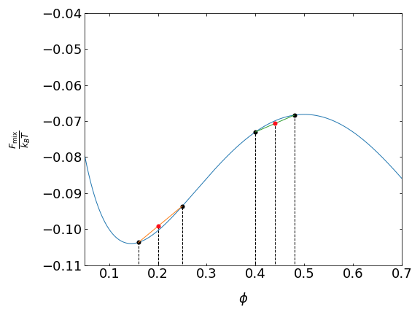

Apparently the above analysis has done nothing else than measuring the sign of the curvature of the free energy curve. We can summarize the conditions as

$\begin{eqnarray} 
\frac{\mathrm d^2F_{\rm mix}}{\mathrm d\phi^2}&>&0\ldots {\rm stable}\\ \frac{\mathrm d^2F_{\rm mix}}{\mathrm d\phi^2}&<&0\ldots {\rm unstable}\\ \frac{\mathrm d^2F_{\rm mix}}{\mathrm d\phi^2}&=&0\ldots {\rm spinodal\, line}\\ \frac{\mathrm d^3F_{\rm mix}}{\mathrm d\phi^3}&=&0\ldots {\rm critical\, point} 
\end{eqnarray}$

The spinodal line therefore separates the metastable from the unstable region. It corresponds to the deflection points of the free energy curve. The critical point, beyond which no phase separation can be achieved at any concentration $\phi$ is defined by setting the third derivative to zero.

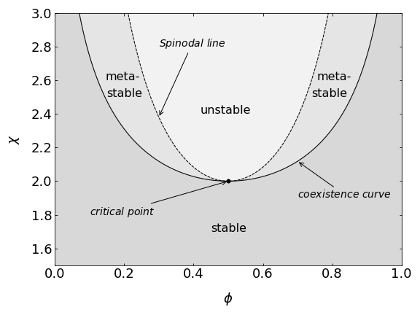

_Phase diagram of an ideal mixture. The interaction parameter is plotted as a function of the composition. The individual regions as defined by the above equation are indicated._We can now plot this free energy of mixing as a function of the volume fraction of component A.
